#Exploration des données

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Charger les données
file_path = 'housing_price_dataset.csv'
data = pd.read_csv(file_path)

# Afficher les premières lignes
print("head : \n", data.head(), "\n")

# Résumé des statistiques
print("describe : \n", data.describe(), "\n")

# Vérifier les valeurs manquantes
print("Vérifier les valeurs manquantes : ", data.isnull().sum())


head : 
    SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065 

describe : 
          SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000      3.000000      2.000000   1985.000000  225052.

#Nettoyage des données

In [5]:
data['Neighborhood'] = data['Neighborhood'].astype(str).str.strip().str.lower()
print(data['Neighborhood'].unique())  # Vérifier les valeurs après nettoyage


['rural' 'suburb' 'urban']


In [6]:
data['Neighborhood'] = data['Neighborhood'].map({
    'rural': 0,  # Assurez-vous que la casse correspond
    'suburb': 1,
    'urban': 2
})
print(data['Neighborhood'].unique())  # Vérifiez à nouveau les valeurs après mappage


[0 1 2]


In [7]:
print(data)
print(data[data['Neighborhood'].isna()])


       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0            2126         4          1             0       1969  215355.283618
1            2459         3          2             0       1980  195014.221626
2            1860         2          1             1       1970  306891.012076
3            2294         2          1             2       1996  206786.787153
4            2130         5          2             1       2001  272436.239065
...           ...       ...        ...           ...        ...            ...
49995        1282         5          3             0       1975  100080.865895
49996        2854         2          2             1       1988  374507.656727
49997        2979         5          3             1       1962  384110.555590
49998        2596         5          2             0       1984  380512.685957
49999        1572         5          3             0       2011  221618.583218

[50000 rows x 6 columns]
Empty DataFrame
Columns: [

In [8]:
data.fillna(data.mean(), inplace=True)


In [9]:
#import matplotlib.pyplot as plt
#import seaborn as sns

#sns.boxplot(data['SquareFeet'])


In [10]:
data_encoded = pd.get_dummies(data, columns=['Neighborhood'], drop_first=True)
#Cette ligne encode la colonne catégorielle Neighborhood en plusieurs colonnes binaires pour chaque catégorie, en supprimant la première catégorie pour éviter la redondance dans les modèles linéaires.

#Transformation des données

In [11]:
data['HouseAge'] = 2024 - data['YearBuilt']
data['SquareFeet_Bedrooms'] = data['SquareFeet'] * data['Bedrooms']
#print(data['SquareFeet_Bedrooms'])


In [12]:


scaler = StandardScaler()
data[['SquareFeet', 'Price']] = scaler.fit_transform(data[['SquareFeet', 'Price']])
#print(data[['SquareFeet', 'Price']])


# Séparation des données

In [13]:


# Séparer les variables explicatives (X) et la variable cible (y)
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']
#print(data_encoded.head())
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Afficher les dimensions des ensembles
print("Dimensions de X_train : ", X_train.shape)
print("Dimensions de X_test : ", X_test.shape)
print("Dimensions de y_train : ", y_train.shape)
print("Dimensions de y_test : ", y_test.shape)

Dimensions de X_train :  (40000, 6)
Dimensions de X_test :  (10000, 6)
Dimensions de y_train :  (40000,)
Dimensions de y_test :  (10000,)


#Construction du modèle

la régression linéaire multiple

In [15]:


# Initialiser le modèle
model = LinearRegression()

# Entraîner le modèle sur X_train et y_train
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erreur quadratique moyenne (MSE) :", mse)
print("Coefficient de détermination (R²) :", r2)

# Afficher les coefficients du modèle
print("Coefficients du modèle :", model.coef_)
print("Intercept du modèle :", model.intercept_)


Erreur quadratique moyenne (MSE) : 2436249371.3072467
Coefficient de détermination (R²) : 0.5755628630306235
Coefficients du modèle : [  99.34424664 5230.28498499 2968.50090091   -5.70699352 -595.53086477
 1416.20221896]
Intercept du modèle : 12322.87355783413


Visualisation des performances

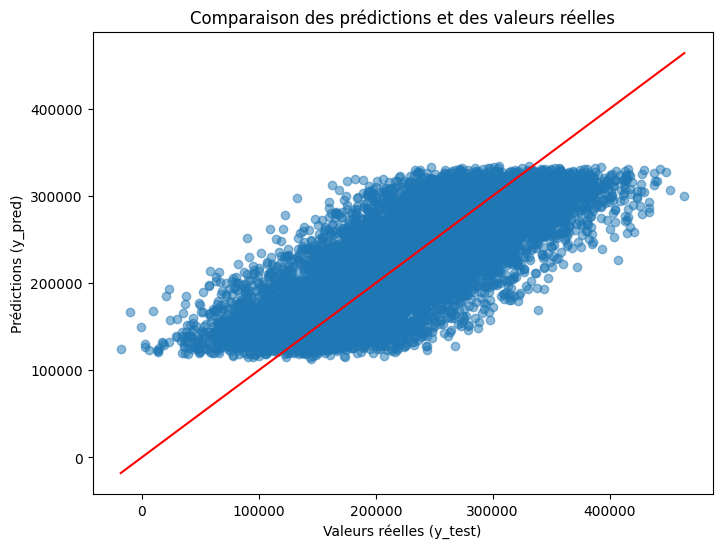

In [16]:

# Comparaison des prédictions avec les valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ligne parfaite
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Comparaison des prédictions et des valeurs réelles")
plt.show()


#Cost Function

In [17]:


def linear_regression_cost_function(X, y, theta):
    """
    Fonction de coût pour la régression linéaire.

    Arguments :
    X -- Matrice des caractéristiques (m x n)
    y -- Vecteur des valeurs cibles (m,)
    theta -- Vecteur des paramètres (n,)

    Retourne :
    J -- Valeur de la fonction de coût
    """
    m = len(y)  # Nombre d'exemples
    predictions = X.dot(theta)  # Prédictions h(x)
    errors = predictions - y  # Erreurs (h(x) - y)
    cost = (1 / (2 * m)) * np.sum(errors ** 2)  # Fonction de coût
    return cost

# Préparer X et y
# Ajouter une colonne de 1 pour le biais
X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Ajouter la colonne de biais
y_train_array = y_train.values if hasattr(y_train, 'values') else y_train  # Convertir y_train en ndarray si nécessaire

# Initialiser les paramètres (theta)
theta_init = np.zeros(X_train_with_bias.shape[1])  # Initialisation des paramètres à zéro
print("X_train_with_bias : ", X_train_with_bias)
print("y_train_array : ", y_train_array)
print("theta_init : ", theta_init)
# Calculer le coût initial
cost = linear_regression_cost_function(X_train_with_bias, y_train_array, theta_init)
print("Coût initial :", cost)


X_train_with_bias :  [[1.0 2498 2 ... 2021 False False]
 [1.0 2380 5 ... 1977 False True]
 [1.0 2274 5 ... 1957 False True]
 ...
 [1.0 2812 4 ... 2010 False True]
 [1.0 2188 3 ... 1979 False True]
 [1.0 2649 5 ... 1953 False False]]
y_train_array :  [288178.19576935 374155.92137825 242571.54923989 ... 248092.66272669
 132414.17762181 288751.04998644]
theta_init :  [0. 0. 0. 0. 0. 0. 0.]
Coût initial : 28172465799.91821


In [18]:


def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Implémente la descente de gradient pour la régression linéaire.

    Arguments :
    X -- Matrice des caractéristiques avec biais (m x n)
    y -- Vecteur des valeurs cibles (m,)
    theta -- Vecteur initial des paramètres (n,)
    alpha -- Taux d'apprentissage
    num_iters -- Nombre d'itérations

    Retourne :
    theta -- Vecteur optimisé des paramètres
    J_history -- Liste des valeurs de la fonction de coût à chaque itération
    """
    m = len(y)  # Nombre d'exemples
    J_history = []  # Historique des coûts

    for i in range(num_iters):
        # Calculer les prédictions
        predictions = X.dot(theta)

        # Calculer les gradients
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)

        # Mettre à jour les paramètres
        theta -= alpha * gradients

        # Enregistrer le coût
        cost = linear_regression_cost_function(X, y, theta)
        J_history.append(cost)

        # Afficher le coût toutes les 100 itérations (optionnel)
        if i % 100 == 0:
            print(f"Iteration {i}: Coût = {cost:.6f}")

    return theta, J_history

# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Ajouter une colonne de biais
X_train_with_bias = np.hstack((np.ones((X_train_normalized.shape[0], 1)), X_train_normalized))
y_train_array = y_train.values if hasattr(y_train, 'values') else y_train

# Initialisation des paramètres
theta_init = np.zeros(X_train_with_bias.shape[1])

# Paramètres de descente de gradient
alpha = 0.01  # Taux d'apprentissage
num_iters = 600  # Nombre d'itérations

# Exécution de la descente de gradient
theta_optimized, cost_history = gradient_descent(X_train_with_bias, y_train_array, theta_init, alpha, num_iters)

print("Paramètres optimisés :", theta_optimized)
print("Coût final :", cost_history[-1])


Iteration 0: Coût = 27636752222.357765
Iteration 100: Coût = 4787660750.943489
Iteration 200: Coût = 1726385154.192935
Iteration 300: Coût = 1316223101.571560
Iteration 400: Coût = 1261266913.347609
Iteration 500: Coût = 1253903448.635694
Paramètres optimisés : [ 2.24255037e+05  5.70079166e+04  5.81714869e+03  2.41579774e+03
 -1.20180405e+02 -2.79066503e+02  6.72727834e+02]
Coût final : 1252919921.9464562


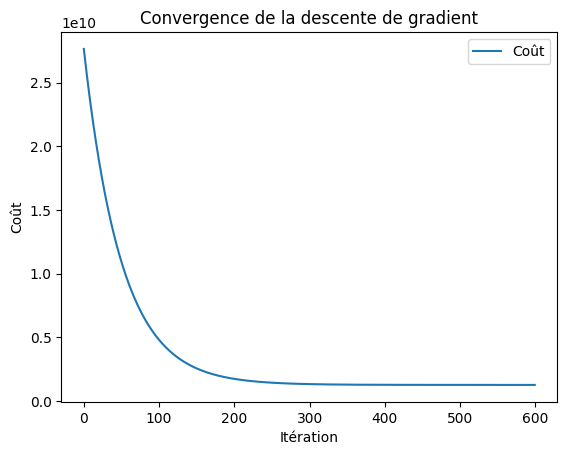

In [19]:
plt.plot(range(len(cost_history)), cost_history, label="Coût")
plt.xlabel("Itération")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.legend()
plt.show()


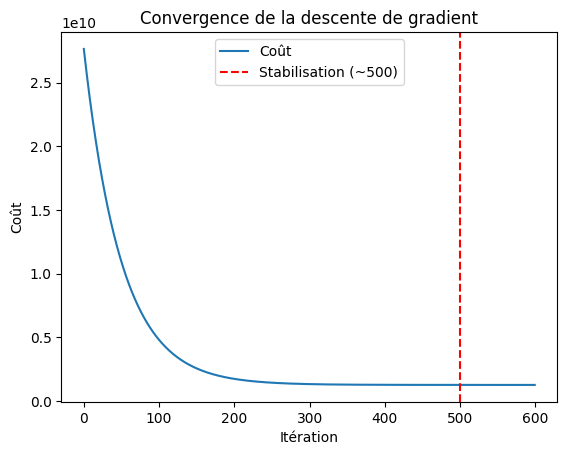

In [20]:
plt.plot(range(len(cost_history)), cost_history, label="Coût")
plt.xlabel("Itération")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.axvline(x=500, color='red', linestyle='--', label="Stabilisation (~500)")
plt.legend()
plt.show()


#Gestion du surajustement

Régression Ridge (L2) :

In [21]:
# Initialiser le modèle Ridge avec alpha = 1
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge - MSE :", mse_ridge)
print("Ridge - R² :", r2_ridge)


Ridge - MSE : 2436249123.654313
Ridge - R² : 0.5755629061760844


Régression Lasso (L1) :

In [22]:
# Initialiser le modèle Lasso avec alpha = 0.1
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso - MSE :", mse_lasso)
print("Lasso - R² :", r2_lasso)


Lasso - MSE : 2436249294.500012
Lasso - R² : 0.5755628764117836


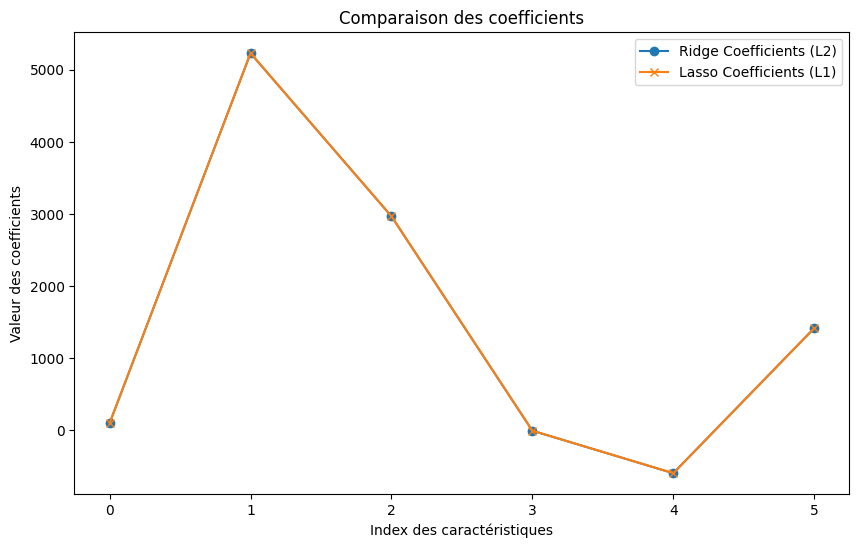

In [23]:
# Obtenir les coefficients
ridge_coefs = ridge_model.coef_
lasso_coefs = lasso_model.coef_

# Visualiser
plt.figure(figsize=(10, 6))
plt.plot(ridge_coefs, label="Ridge Coefficients (L2)", marker='o')
plt.plot(lasso_coefs, label="Lasso Coefficients (L1)", marker='x')
plt.title("Comparaison des coefficients")
plt.xlabel("Index des caractéristiques")
plt.ylabel("Valeur des coefficients")
plt.legend()
plt.show()


#Validation croisée

In [24]:
# Initialiser le modèle
model = LinearRegression()

# Validation croisée avec 5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

print("Scores R² pour chaque fold :", cv_scores)
print("Moyenne du R² :", cv_scores.mean())


Scores R² pour chaque fold : [0.56739038 0.56574749 0.56180311 0.58279735 0.56482187]
Moyenne du R² : 0.5685120375203611


#Amélioration du modèle

Arbre de décision :

Arbre de décision - MSE : 2513712811.3985877
Arbre de décision - R² : 0.5620673805404524


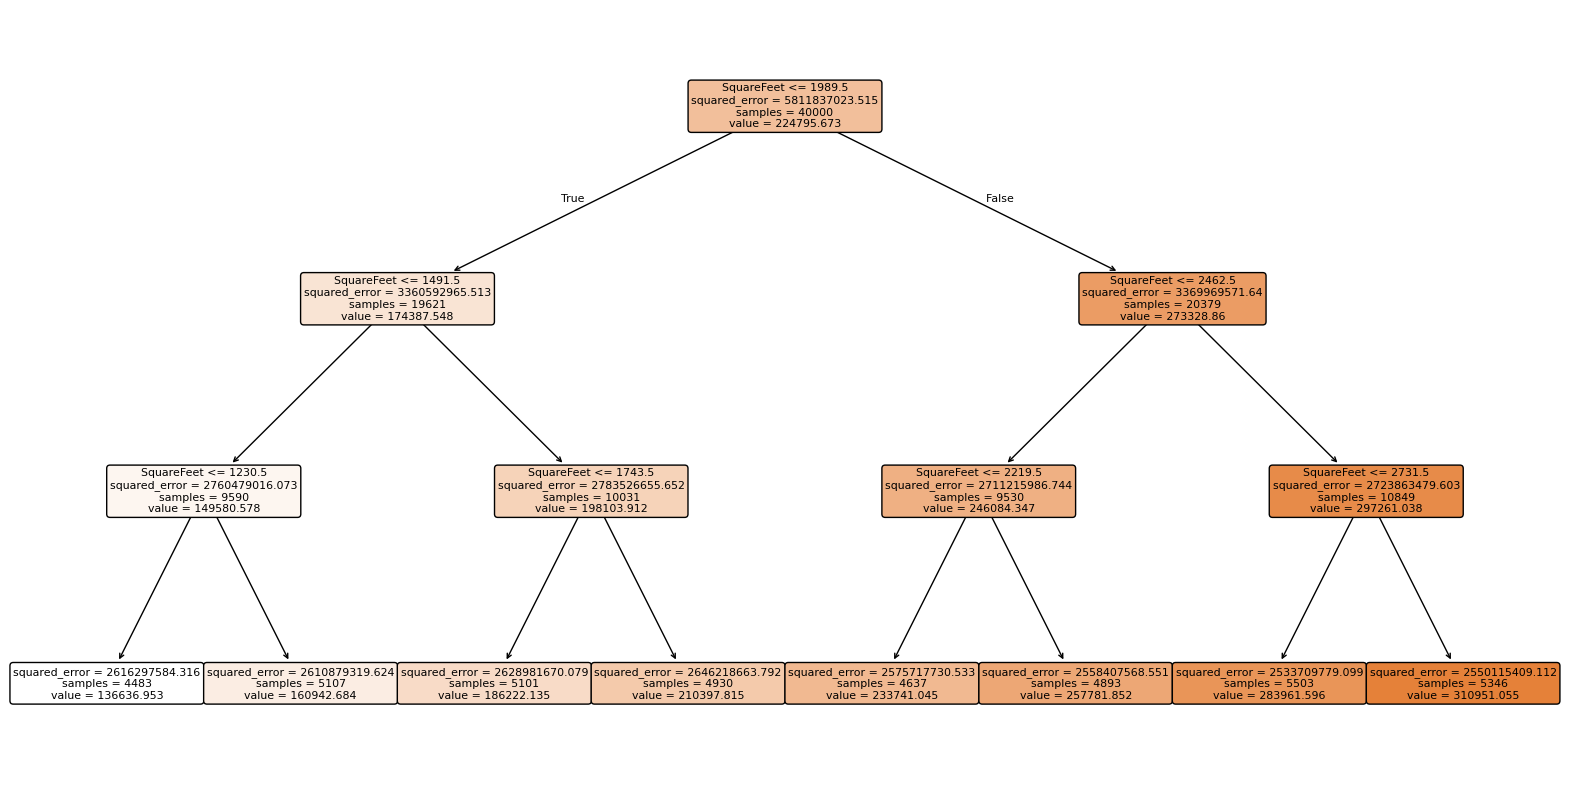

In [25]:
# Initialiser le modèle
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entraîner et évaluer
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Évaluer le modèle
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Arbre de décision - MSE :", mse_tree)
print("Arbre de décision - R² :", r2_tree)


plt.figure(figsize=(20, 10))  # Ajuster la taille du graphe
plot_tree(tree_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()


Random Forest :

Random Forest - MSE : 2905838225.5245423
Random Forest - R² : 0.4937522933967883


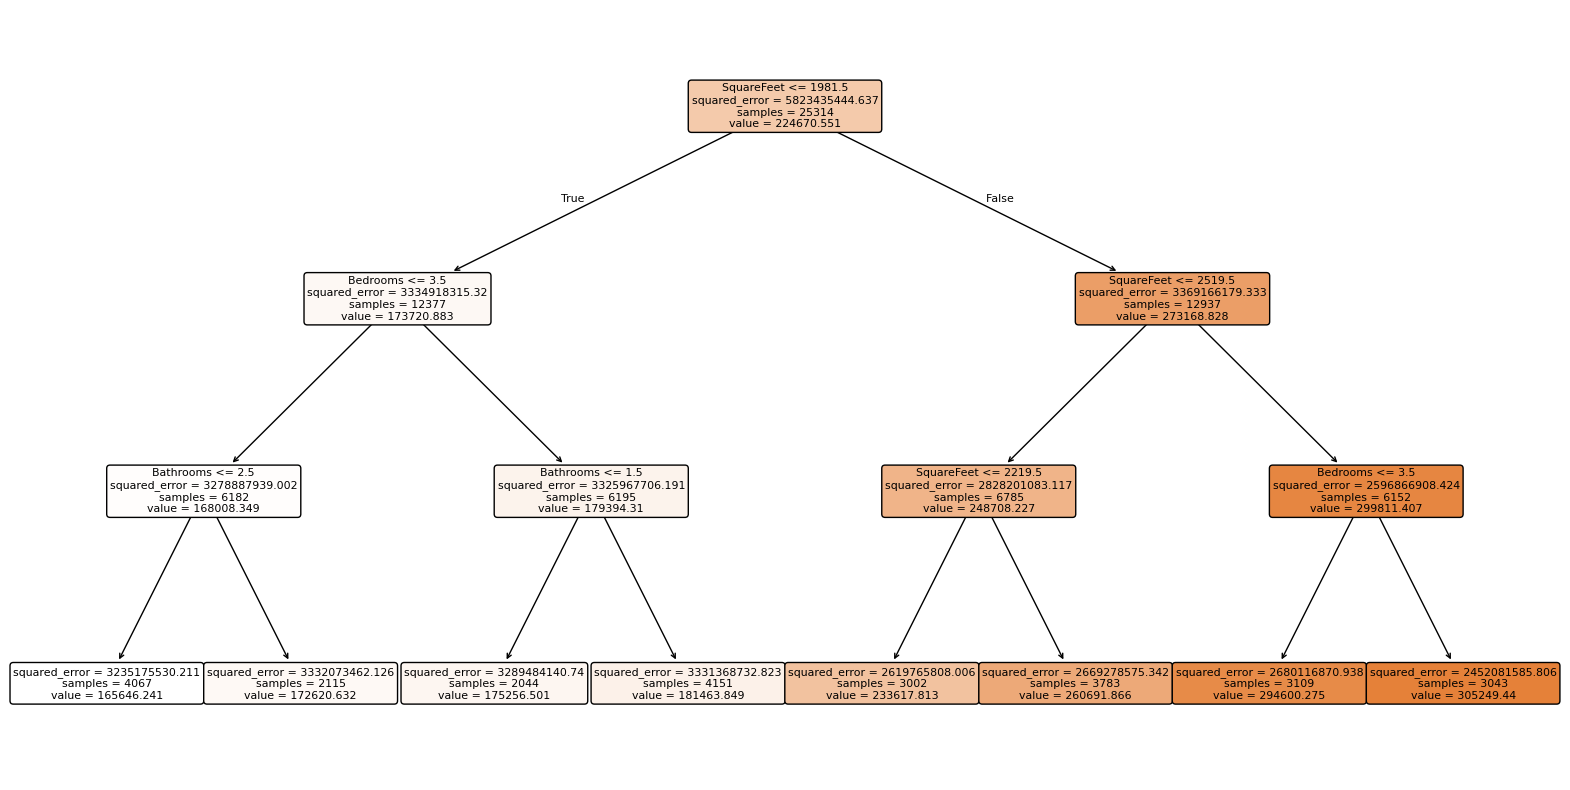

In [26]:
# Initialiser le modèle avec n_estimators=1 et n_jobs=-1 pour utiliser tous les cœurs du CPU
rf_model = RandomForestRegressor(n_estimators=1, max_depth=3, max_features=3, random_state=42, n_jobs=-1)


# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE :", mse_rf)
print("Random Forest - R² :", r2_rf)

# Sélectionner le premier arbre de la forêt
tree = rf_model.estimators_[0]

# Tracer l'arbre
plt.figure(figsize=(20, 10))

# Si X_train est un DataFrame, on utilise X_train.columns, sinon il faut simplement supprimer feature_names
plot_tree(tree, filled=True, feature_names=X_train.columns if hasattr(X_train, 'columns') else None, rounded=True)

# Afficher le graphique
plt.show()


Transformation des variables :

In [27]:
# Appliquer la transformation logarithmique
data['SquareFeet_log'] = np.log1p(data['SquareFeet'])
data['Price_log'] = np.log1p(data['Price'])

# Vérifier les nouvelles colonnes
print(data[['SquareFeet', 'SquareFeet_log', 'Price', 'Price_log']].head())


   SquareFeet  SquareFeet_log     Price  Price_log
0    0.207861        0.188851 -0.124401  -0.132847
1    0.786480        0.580247 -0.391551  -0.496842
2   -0.254340       -0.293486  1.077785   0.731302
3    0.499777        0.405316 -0.236936  -0.270413
4    0.214811        0.194588  0.625272   0.485675


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


#Comparaison des modèles

In [28]:
# Créer un résumé des résultats
results = pd.DataFrame({
    "Modèle": ["Régression linéaire", "Arbre de décision", "Random Forest", "Ridge", "Lasso"],
    "MSE": [mse, mse_tree, mse_rf, mse_ridge, mse_lasso],
    "R²": [r2, r2_tree, r2_rf, r2_ridge, r2_lasso]
})

print(results)


                Modèle           MSE        R²
0  Régression linéaire  2.436249e+09  0.575563
1    Arbre de décision  2.513713e+09  0.562067
2        Random Forest  2.905838e+09  0.493752
3                Ridge  2.436249e+09  0.575563
4                Lasso  2.436249e+09  0.575563


In [29]:
# Définir la fonction de coût MSE (Mean Squared Error)
def cost_function_mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Définir la fonction de coût MAE (Mean Absolute Error)
def cost_function_mae(y_true, y_pred):
    return abs(y_true - y_pred).mean()

# Calculer la fonction de coût pour chaque modèle
# Pour la Régression Linéaire
mse_linear = cost_function_mse(y_test, y_pred)
mae_linear = cost_function_mae(y_test, y_pred)

# Pour l'Arbre de Décision
mse_tree = cost_function_mse(y_test, y_pred_tree)
mae_tree = cost_function_mae(y_test, y_pred_tree)

# Pour le Random Forest
mse_rf = cost_function_mse(y_test, y_pred_rf)
mae_rf = cost_function_mae(y_test, y_pred_rf)

# Pour Ridge
mse_ridge = cost_function_mse(y_test, y_pred_ridge)
mae_ridge = cost_function_mae(y_test, y_pred_ridge)

# Pour Lasso
mse_lasso = cost_function_mse(y_test, y_pred_lasso)
mae_lasso = cost_function_mae(y_test, y_pred_lasso)

# Résumer les résultats avec les fonctions de coût
results = pd.DataFrame({
    "Modèle": ["Régression linéaire", "Arbre de décision", "Random Forest"],
    "MSE": [mse_linear, mse_tree, mse_rf],
    "MAE": [mae_linear, mae_tree, mae_rf],
    "R²": [r2, r2_tree, r2_rf]
})

# Afficher le résumé des résultats
print(results)


                Modèle           MSE           MAE        R²
0  Régression linéaire  2.436249e+09  39430.165338  0.575563
1    Arbre de décision  2.513713e+09  40018.024382  0.562067
2        Random Forest  2.905838e+09  43079.069917  0.493752


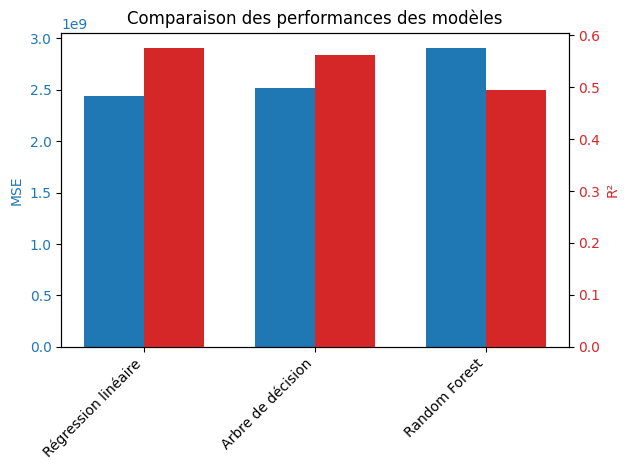

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Noms des modèles
models = ['Régression linéaire', 'Arbre de décision', 'Random Forest']

# Scores des modèles
mse_scores = [mse_linear, mse_tree, mse_rf]
r2_scores = [r2, r2_tree, r2_rf]

x = np.arange(len(models))  # Indices des modèles
width = 0.35  # Largeur des barres

fig, ax1 = plt.subplots()

# Barres pour MSE
rects1 = ax1.bar(x - width/2, mse_scores, width, label='MSE', color='tab:blue')
ax1.set_ylabel('MSE', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Second axe Y pour R²
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, r2_scores, width, label='R²', color='tab:red')
ax2.set_ylabel('R²', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titres et labels
ax1.set_title('Comparaison des performances des modèles')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')

fig.tight_layout()
plt.show()


In [31]:
final_features = X_train.columns.tolist()  # Convert to a list for easier handling

print("Final Features:", final_features)

Final Features: ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Neighborhood_1', 'Neighborhood_2']
